In [1]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Temperatura - Vento - Insolação Total

In [3]:
file_path = Path(
    '../../Dados/Dados-Metereologicos/Diarios/' +\
     'dados_82798_D_C_2008-01-01_2013-12-31.csv'
     ) 

In [7]:
#importando dataframe
df = pd.read_csv(file_path, header=9, sep=';')

#excluindo a coluna a mais
df.drop('Unnamed: 7', axis=1, inplace=True)

#tornando a data o índice
df['Data Medicao'] = pd.to_datetime(df['Data Medicao'])
df.set_index('Data Medicao', inplace=True)

#transformando o tipo dos dados para float
for coluna in df.columns: 
    df[coluna] = df[coluna].str.replace(',','.').astype(float) 

df.head()

,"INSOLACAO TOTAL, DIARIO(h)","PRECIPITACAO TOTAL, DIARIO(mm)","TEMPERATURA MAXIMA, DIARIA(°C)","TEMPERATURA MEDIA COMPENSADA, DIARIA(°C)","TEMPERATURA MINIMA, DIARIA(°C)","VENTO, VELOCIDADE MEDIA DIARIA(m/s)"
Data Medicao,,,,,,
2008-01-01,10.4,0.0,31.0,27.82,25.5,3.133333
2008-01-02,10.2,0.0,30.8,27.94,25.1,3.733333
2008-01-03,9.8,0.0,31.6,28.26,24.7,5.200000
2008-01-04,9.2,0.0,31.2,28.18,26.1,4.066667
2008-01-05,10.2,0.0,31.0,28.18,25.5,3.833333


In [22]:
#Gráficos

plt.style.use('seaborn-dark-palette')

#função criada para colocar os subplots
def met_subplots(fig_axes, coluna, label_y, legenda):
    
    ano = 2008
    for i in range(3):
        for j in range(2):
         #selecionando o dado que vai ser realizado no subplot
            fig_axes[i,j].plot(df.loc[df.index.year == ano][coluna], label=legenda)

            #definindo o título do subplot
            fig_axes[i,j].set_title(f'Ano de {ano}', size=25)
            ano = ano + 1

            #definindo labels
            fig_axes[i,j].set_xlabel(label_x, size=20)
            fig_axes[i,j].set_ylabel(label_y, size=20)

            #ajustando os ticks
            fig_axes[i,j].tick_params(axis='x', labelsize=16, rotation=40)
            fig_axes[i,j].tick_params(axis='y', labelsize=16)

            #f1_axes[i,j].xaxis.set_major_locator(df_temp.index)
            #f1_axes[i,j].xaxis.set_major_formatter(fmt)
            #f1_axes[i,j].xaxis.set_minor_locator(days)

            #adicionando a grade e a legenda ao subplot
            fig_axes[i,j].grid()
            if legenda != '':
                fig_axes[i,j].legend()

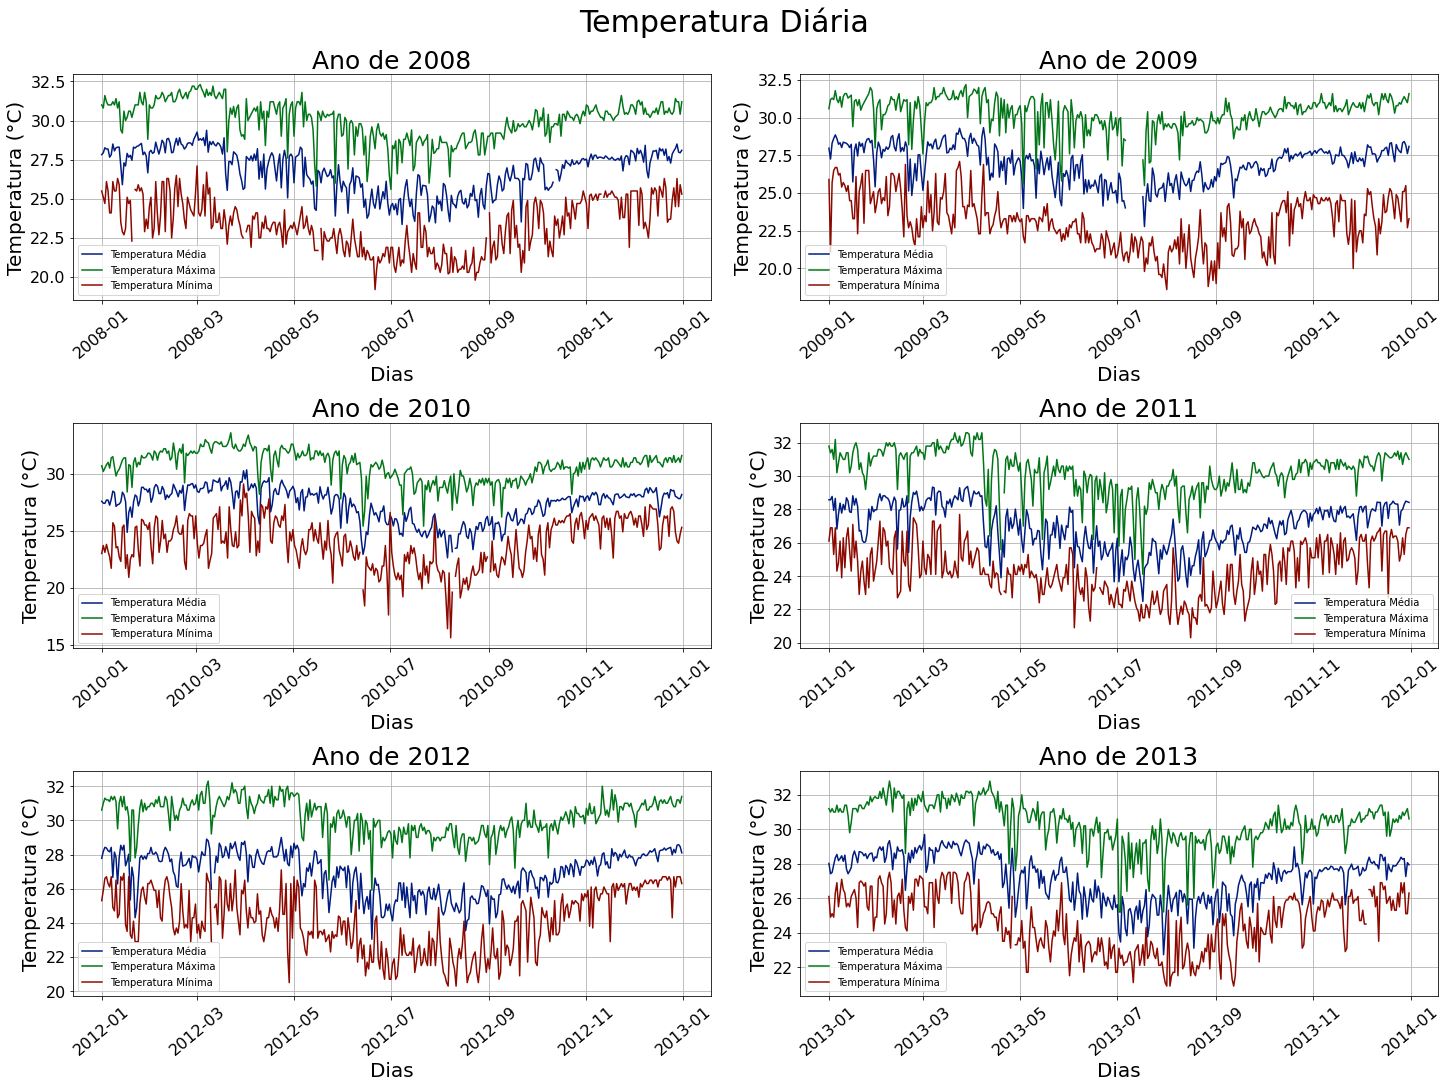

In [23]:
#Temperatura

#criando os objetos para realizar o subplot
fig1, f1_axes  = plt.subplots(ncols=2, nrows=3, constrained_layout=True, figsize=(20,15))

#Definindo o título superior
fig1.suptitle('Temperatura Diária', size=30)

#Definindo os labels x e y
label_x = 'Dias'
label_y_T = 'Temperatura (°C)'
coluna_temp_media = 'TEMPERATURA MEDIA COMPENSADA, DIARIA(°C)'
coluna_temp_max = 'TEMPERATURA MAXIMA, DIARIA(°C)'
coluna_temp_min = 'TEMPERATURA MINIMA, DIARIA(°C)'

#usando a função para realizar o gráfico
met_subplots(fig_axes = f1_axes, coluna = coluna_temp_media, label_y = label_y_T, legenda = 'Temperatura Média')
met_subplots(fig_axes = f1_axes, coluna = coluna_temp_max, label_y = label_y_T, legenda = 'Temperatura Máxima')
met_subplots(fig_axes = f1_axes, coluna = coluna_temp_min, label_y = label_y_T, legenda = 'Temperatura Mínima')

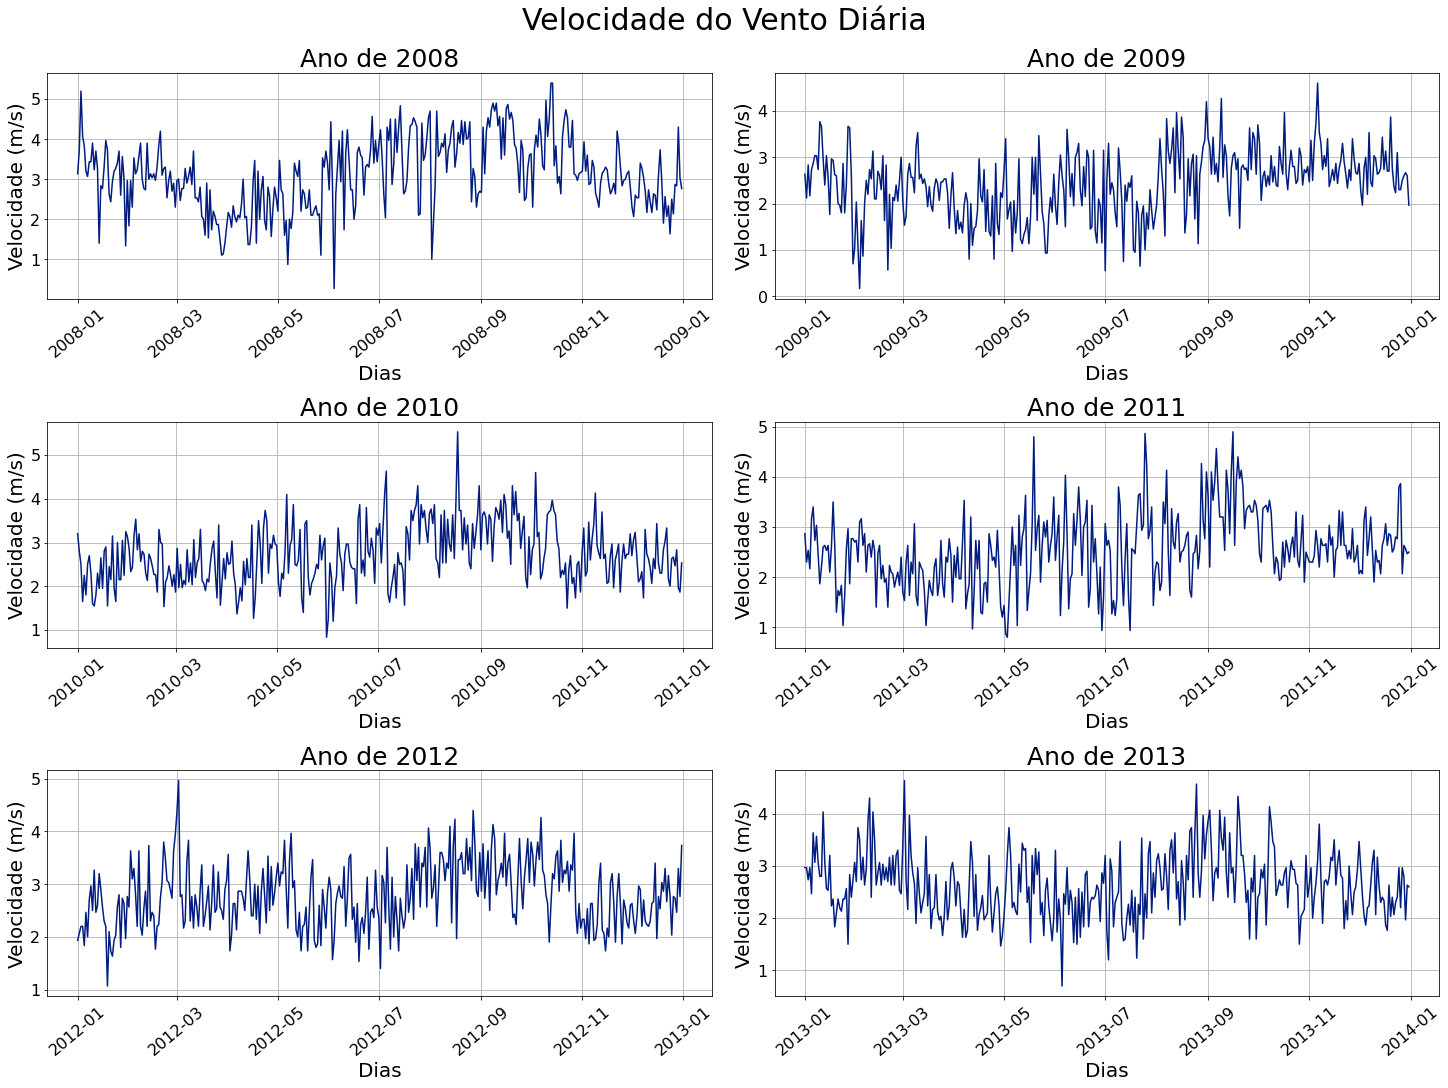

In [27]:
#Vento

#criando os objetos para realizar o subplot
fig2, f2_axes  = plt.subplots(ncols=2, nrows=3, constrained_layout=True, figsize=(20,15))

#Definindo o título superior
fig2.suptitle('Velocidade do Vento Diária', size=30)

#Definindo os labels x e y
label_x = 'Dias'
label_y_V = 'Velocidade (m/s)'
coluna_vento_media = 'VENTO, VELOCIDADE MEDIA DIARIA(m/s)'

#usando a função para realizar o gráfico
met_subplots(fig_axes = f2_axes, coluna = coluna_vento_media , label_y = label_y_V, legenda = '')

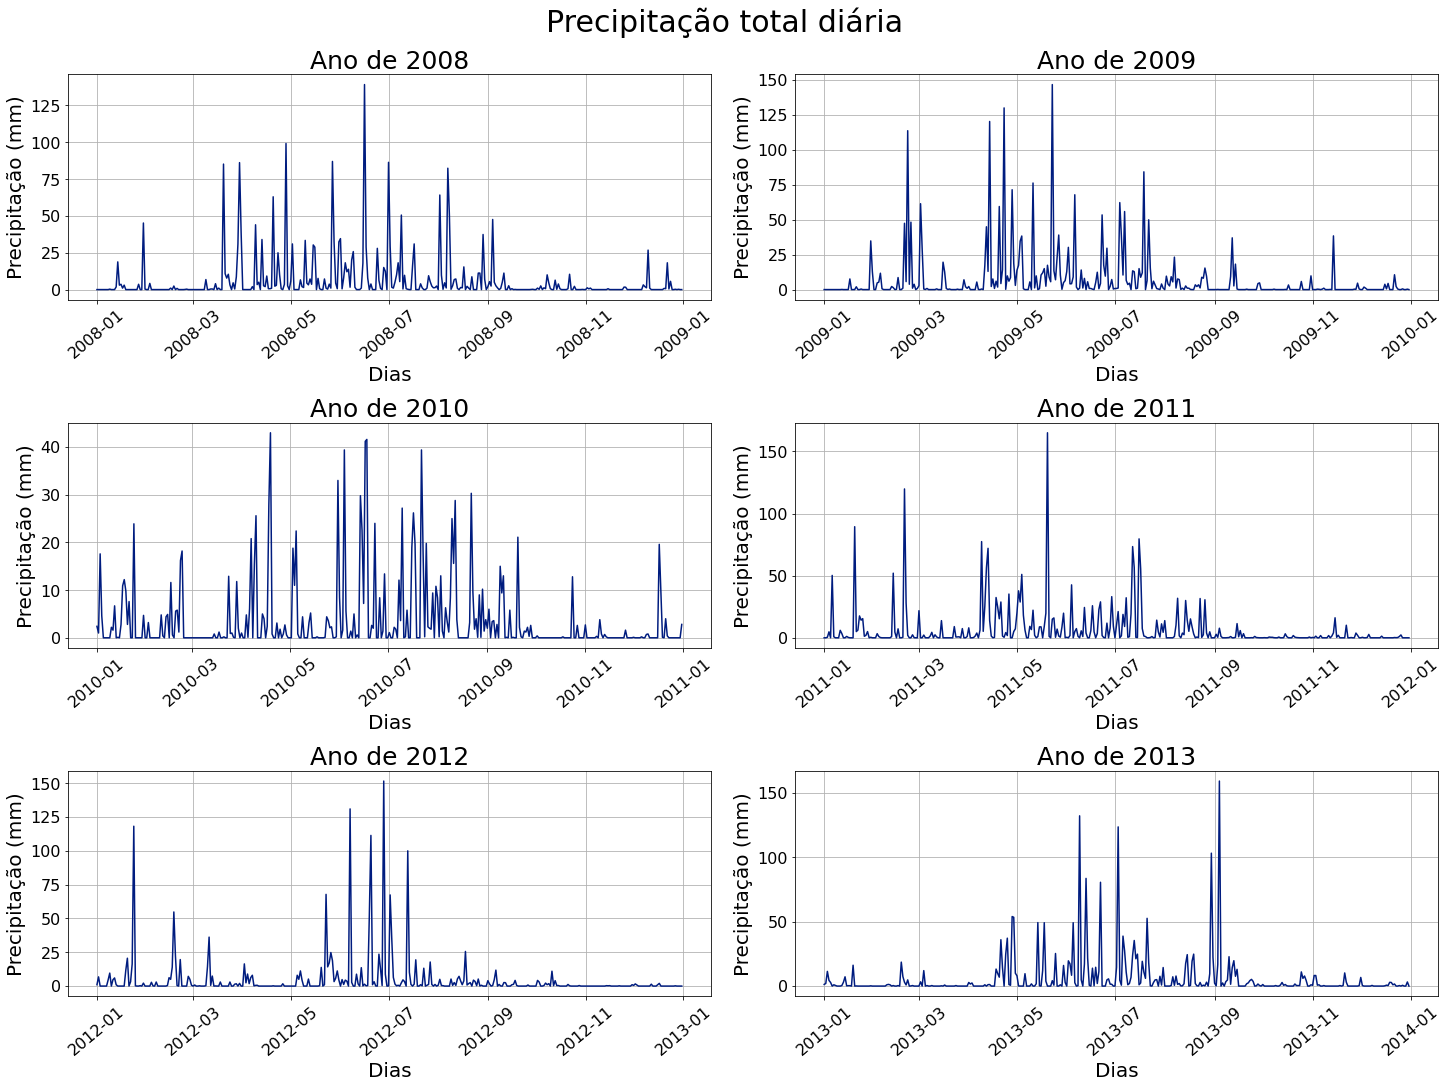

In [28]:
#Chuva

#criando os objetos para realizar o subplot
fig3, f3_axes  = plt.subplots(ncols=2, nrows=3, constrained_layout=True, figsize=(20,15))

#Definindo o título superior
fig3.suptitle('Precipitação total diária', size=30)

#Definindo os labels x e y
label_x = 'Dias'
label_y_C = 'Precipitação (mm)'
coluna_chuva_media = 'PRECIPITACAO TOTAL, DIARIO(mm)'

#usando a função para realizar o gráfico
met_subplots(fig_axes = f3_axes, coluna = coluna_chuva_media , label_y = label_y_C, legenda = '')

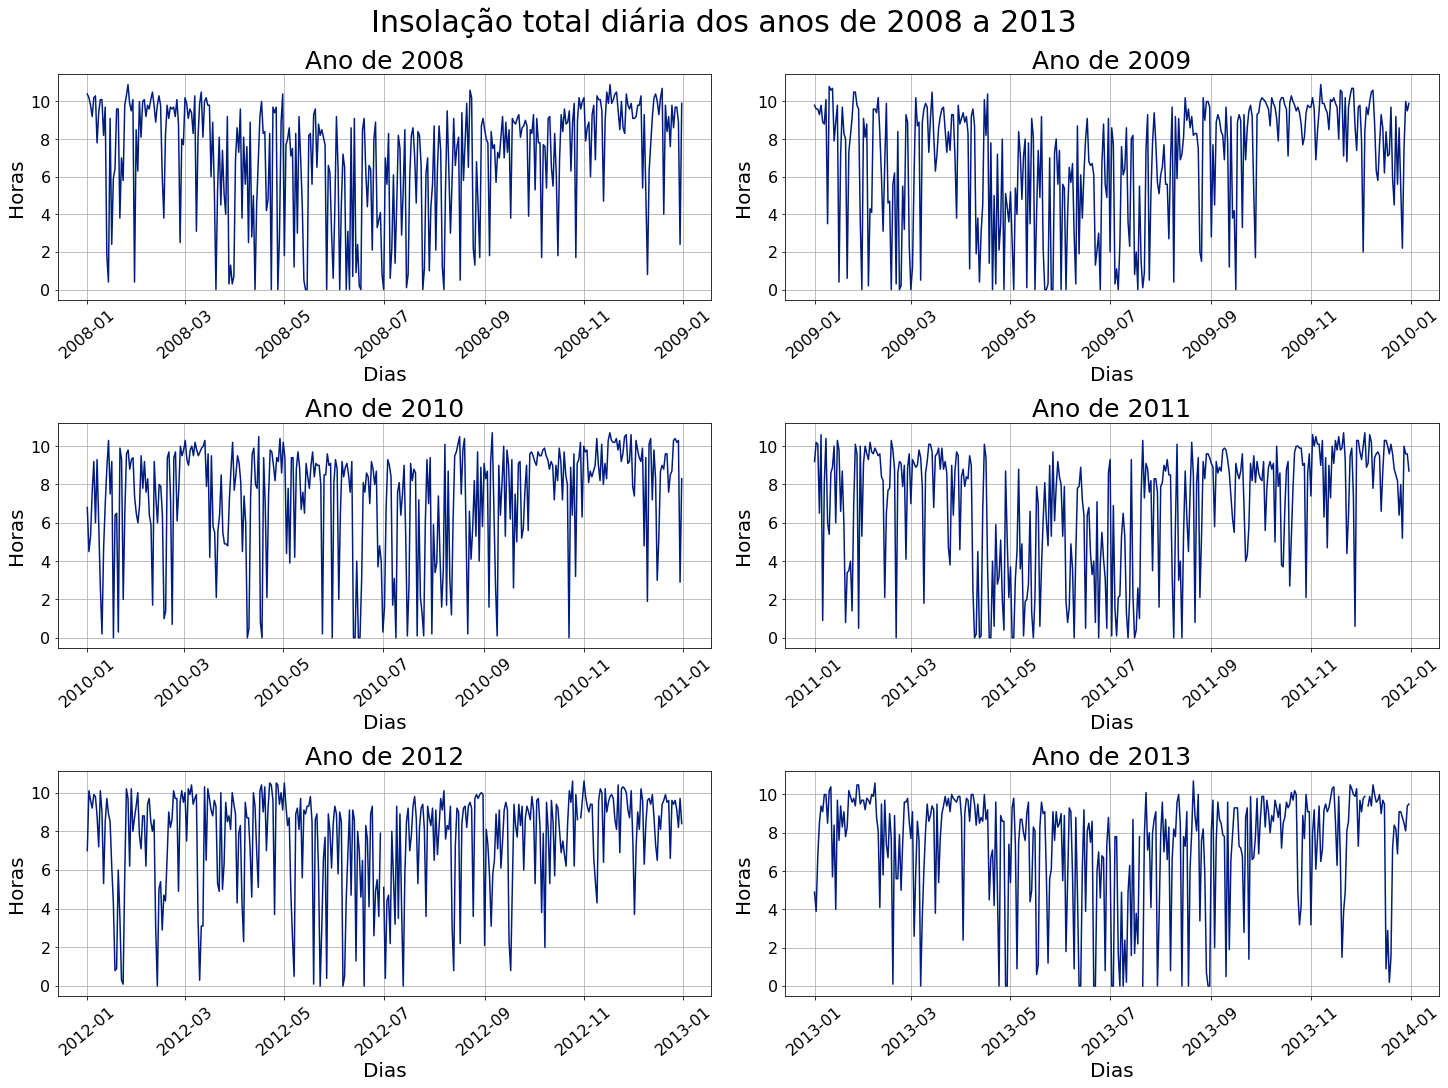

In [24]:
# Gráfico insolação 
fig4, f4_axes = plt.subplots(ncols=2, nrows=3, constrained_layout=True, figsize=(20,15))

fig4.suptitle('Insolação total diária dos anos de 2008 a 2013', size=30)

label_y_insolacao = 'Horas' 
coluna_insolacao = 'INSOLACAO TOTAL, DIARIO(h)'

met_subplots(fig_axes = f4_axes, coluna = coluna_insolacao, label_y = label_y_insolacao, legenda = '')        
